# Preprocessing Structured Data

Before we actually feed the data into any deep learning system we should look through it carefully. In addition to the kinds of big-picture problems that might arise in collecting data from a noisy world, we need to look out for missing values, strange outliers, and potential errors in the data. The data doesn't have to be completely error free, although obviously that would be best. Frequently, with the size of data we're dealing with, it is not realistic to completely scrub the data of any errors. 

Once we have a collection of data that has a tolerable amount of errors (ideally error free, though that does not HAVE to be the case) we have to transform it into a deep learning friendly format. There are a number of tricks that machine learning practitioners apply to get better results from the same data.

It's also wise to explore the data and look for interesting outliers, correlation between different parts of the data, and other anomolies, oddities, and trends. Of course, we're hoping that our deep learning system can tease these out even better than we could—but that's not a good reason to shirk your own responsibility to understand the dataset. Sophisticated as they are, neural nets are still just tools, and understanding the data can help use hone our tools in the areas where they'll be most successful. 

For this lab we're going to use a public domain dataset from Kaggle. You can find the dataset here:

https://www.kaggle.com/new-york-city/nyc-property-sales

To run this code you'll need to download and unzip that data.

There is useful supporting information about this dataset as well at the following two URLs:

https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html

The dataset is a record of every building/condo/appartment that was sold in New York City over a 12 month period.

In [1]:
# Pandas is a fantastic and powerful tool for working with structured data
# it's the best of spreadsheets + python, and it has quickly become a go to
# library for data scientists in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your path may vary, change this appropriately
path_to_ny_sales = 'datasets/nyc-rolling-sales.csv'

# One of the things we love about pandas is that it's easy to load CSV data
# into a "data frame"
sales_df = pd.read_csv(path_to_ny_sales)

# And, it makes it easy to take a look at the first n items:
sales_df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
# And a summary with bundles of useful information on the numerical fields
sales_df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [3]:
# Sometimes we get some unexpected datatypes when loading data
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    print(col, dtype)

Unnamed: 0 int64
BOROUGH int64
NEIGHBORHOOD object
BUILDING CLASS CATEGORY object
TAX CLASS AT PRESENT object
BLOCK int64
LOT int64
EASE-MENT object
BUILDING CLASS AT PRESENT object
ADDRESS object
APARTMENT NUMBER object
ZIP CODE int64
RESIDENTIAL UNITS int64
COMMERCIAL UNITS int64
TOTAL UNITS int64
LAND SQUARE FEET object
GROSS SQUARE FEET object
YEAR BUILT int64
TAX CLASS AT TIME OF SALE int64
BUILDING CLASS AT TIME OF SALE object
SALE PRICE object
SALE DATE object


In [4]:
# Look at these types... many are wrong or misleading. 

# The first two columns are ... kind of irrelelvant. The first is just the index for the data
# the second is named 'Unnamed: 0' which doesn't sound important. Lets look at it anyway: 

# We can check if there is ever a duplicate value in that column:
print(any(sales_df['Unnamed: 0'].duplicated()))

# And we can see which ones. This syntax often confuses Pandas newbs
# .duplicated() returns a parallel dataframe with one column set to
# True if the value in the 'Unnamed: 0' column is duplicated, false otherwise
# for every entry in the dataframe. Using the == comparison operator like this
# within the [] of a dataframe access acts as a filter.
multi_sale_units = sales_df[sales_df['Unnamed: 0'].duplicated() == True]

multi_sale_units

True


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18306,4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,,A1,4455 PARK AVENUE,...,1,0,1,1622,1587,1899,1,A1,140000,2017-05-12 00:00:00
18307,5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036,13,,A1,4348 PARK AVENUE,...,1,0,1,3525,1764,1899,1,A1,420000,2017-02-03 00:00:00
18308,6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,,A1,1948 BATHGATE AVENUE,...,1,0,1,2356,2047,1901,1,A1,127000,2017-08-22 00:00:00
18309,7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,273796,2016-09-21 00:00:00
18310,8,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,231244,2016-09-21 00:00:00
18311,9,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,27,,A1,538 EAST 182 STREET,...,1,0,1,1209,1048,1901,1,A1,0,2016-09-20 00:00:00
18312,10,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,28,,A1,540 EAST 182 STREET,...,1,0,1,1209,1048,1901,1,A1,290000,2016-09-27 00:00:00
18313,11,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,105,,A1,2323 BASSFORD AVENUE,...,1,0,1,922,1248,1901,1,A1,0,2017-03-16 00:00:00
18314,12,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,151,,B1,519 EAST 171 STREET,...,2,0,2,2000,2400,1993,1,B1,0,2016-10-24 00:00:00
18315,13,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2929,128,,B1,559 CLAREMONT PARKWAY,...,2,0,2,2361,2394,1995,1,B1,0,2017-05-04 00:00:00


In [5]:
# So there were ~84,500 sales records, and 57,812 records where the 'Unnamed: 0' appeared 
# in more than one record. Lets look at ONE such value:
building_8413_records = sales_df[sales_df['Unnamed: 0'] == 8413]

building_8413_records

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8409,8413,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1338,1092,,R4,301 EAST 45TH STREET,...,1,0,1,-,-,1980,2,R4,965000,2017-06-16 00:00:00
33764,8413,3,CONEY ISLAND,02 TWO FAMILY DWELLINGS,1,7019,86,,B1,2811 WEST 20TH STREET,...,2,0,2,1000,1400,1901,1,B1,0,2016-10-05 00:00:00
57811,8413,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,4409,1011,,R4,136-16 31ST ROAD,...,1,0,1,-,-,2008,2,R4,559000,2016-10-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


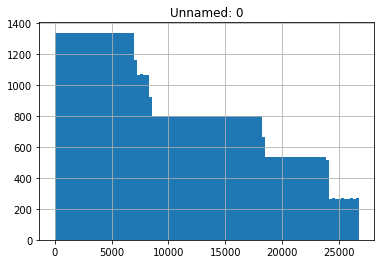

In [6]:
# Well... the duplicate values suggest it's not an ID, my first hypothosis. Lets plot a histogram
# and see if it's revealing.
sales_df.hist(column='Unnamed: 0', bins=100)
plt.show()

In [7]:
# weird. The data is undocumented, and has a strange distribution.
# Lets see if it correlates with anything?
sales_df.corrwith(sales_df['Unnamed: 0'])

Unnamed: 0                   1.000000
BOROUGH                      0.088817
BLOCK                        0.264130
LOT                         -0.031601
ZIP CODE                     0.166882
RESIDENTIAL UNITS           -0.013318
COMMERCIAL UNITS            -0.002821
TOTAL UNITS                 -0.012856
YEAR BUILT                  -0.004057
TAX CLASS AT TIME OF SALE    0.017395
dtype: float64

In [8]:
# There is a very weak correlation with block and zip code... which is spurrious because those are both
# actually categorical columns, not numerical columns. Lets see if it has any correlation with what we
# CARE about specifically:
sales_df['SALE PRICE'].corr(sales_df['Unnamed: 0'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [9]:
# Uh oh — looks like we've got some problems in our sale amount data...
# Lets take a look:
sales_df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
5             -  
6         3192840
7             -  
8             -  
9        16232000
10            -  
11       10350000
12              1
13         499000
14             10
15         529500
16         423000
17         501000
18         450000
19         510000
20            -  
21         350000
22       11900000
23       11900000
24         350000
25         404000
26         535000
27        1400000
28         866000
29         355000
           ...   
84518      875000
84519      875000
84520      840000
84521      772500
84522      740000
84523         -  
84524         -  
84525         -  
84526      590000
84527      580000
84528      550000
84529      545000
84530      800000
84531      642500
84532      408092
84533      600000
84534      610000
84535      645000
84536      168000
84537      625000
84538         -  
84539         -  
84540      509000
84541      648000
84542     

In [10]:
# Looks like the data is a string type, and sometimes has a value of -
# The documentation suggests the - value means that there was no sale
# just a property transfer for nothing, such as an inheritance. 
# Lets try to coerce the data to numeric where possible:
coerced_sales = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')

# Values that cannot be coerced are changed to Not a Number (NaN). 
# We can use this code to examine those values:
only_non_numerics = sales_df['SALE PRICE'][coerced_sales.isna()]

# And this to print all the unique values from only_non_numerics
only_non_numerics.unique()

array([' -  '], dtype=object)

In [11]:
# So, indeed, the only value that wasn't a number as a string was the ' - ' value. 
# good to know. Lets go ahead and coerce them all
sales_df['SALE PRICE'] = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].fillna(0)

In [12]:
# Now we should be able to check the correlation we wanted to originally:
sales_df['SALE PRICE'].corr(sales_df['Unnamed: 0'])

-0.01550875289804219

In [13]:
# So... I'm going to go out on a limb and say 'Unnamed: 0' is a junk column. Lets delete it
# along with a few others that we don't want to use.
sales_df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [14]:
sales_df = sales_df.drop(columns=[
    'Unnamed: 0',
    'ADDRESS',          # Hard to parse. Block/zip/borough/neighborhood capture all the value we need. 
    'APARTMENT NUMBER', # Likely irrelevent to the price. Ought to be categorical, which would make data large.
    'SALE DATE',        # Everything was within a 12 month period, likely irrelevant and hard to parse.
    'LOT'               # A lot is a unique identifier within a block, and categorical. Not worth it. 
])

# Look again with dropped columns
sales_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,28,3,31,4616,18690,1900,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,16,1,17,2212,7803,1900,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000.0


In [15]:
sales_df.describe()

,BOROUGH,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,1.056623e+06
std,1.289790,3568.263407,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,3.000000,3311.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,4.000000,6281.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [16]:
# Two other columns should be numeric, but are objects. Lets look at them too:
convert_to_numeric = [
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET'
]

for col in convert_to_numeric:
    coerced = pd.to_numeric(sales_df[col], errors='coerce')
    only_non_numerics = sales_df[col][coerced.isna()]

    # And this to print all the unique values from only_non_numerics
    print(col, only_non_numerics.unique())

LAND SQUARE FEET [' -  ']
GROSS SQUARE FEET [' -  ']


In [17]:
# So... similarly there are missing values. But, unlike the sale data, we don't have 
# any clues about what this means, and it's hard to imagine that a building exists with
# but occupies zero square feet... We'll apply another common tactic called "imputation"
# We're just going to use the mean value when there is missing data, it's better than nothing
# even though it may be wrong.
from sklearn.impute import SimpleImputer

# First lets just coerce the values to nan
for col in convert_to_numeric:
    coerced = pd.to_numeric(sales_df[col], errors='coerce')
    sales_df[col] = coerced
    sales_df[col] = sales_df[col].astype('float')
    
# Then, we can use the Imputer to fill in any missing values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 

# Only fit it on our two relevant columns, to save time
imputer.fit(sales_df[convert_to_numeric])
imputed_values = imputer.transform(sales_df[convert_to_numeric])

# Now replace our old Series with the new imputed values. 
sales_df['LAND SQUARE FEET'] = imputed_values[:, 0]
sales_df['GROSS SQUARE FEET'] = imputed_values[:, 1]

sales_df.describe()

,BOROUGH,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.056623e+06
std,1.289790,3568.263407,1290.879147,16.721037,8.713183,18.972584,3.486182e+04,2.874826e+04,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,0.000000e+00
50%,3.000000,3311.000000,11209.000000,1.000000,0.000000,1.000000,3.200000e+03,2.520000e+03,1940.000000,2.000000,4.150000e+05
75%,4.000000,6281.000000,11357.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


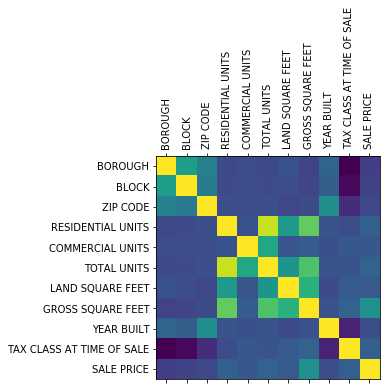

In [18]:
# One really cool and helpful thing we can do in pandas is checkout the correlation matrix:
correlation_matrix = sales_df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical');
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
plt.show()

In [19]:
# We can see that everything perfectly correlates with itself, obviously. 
# Some of this is still spurious, since for example ZIP CODE seems to correlate
# weakly with SALE PRICE But it's actually a categorical value, not a numeric one. 

# Lets inform pandas that these values ought to be considered categorical.
categorical_columns = [
    'BOROUGH',
    'BLOCK',
    'ZIP CODE',
    'TAX CLASS AT TIME OF SALE'
]

for c in categorical_columns:
    sales_df[c] = sales_df[c].astype('category')

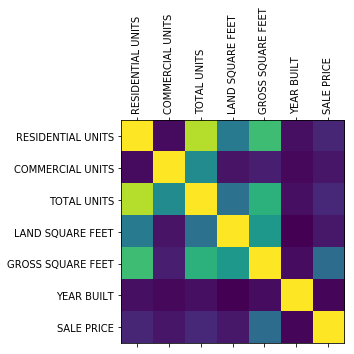

In [20]:
# Try the matrix again:
correlation_matrix = sales_df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical');
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
plt.show()

In [21]:
# Not surprising that total units seems to correlate most with price. 
# Interesting that residential units seems more correlated than commercial

# What haven't we looked at...
sales_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

In [22]:
sales_df['EASE-MENT'].unique()

array([' '], dtype=object)

In [23]:
# It only has one value, junk it. 
sales_df = sales_df.drop(columns=['EASE-MENT'])

RESIDENTIAL UNITS


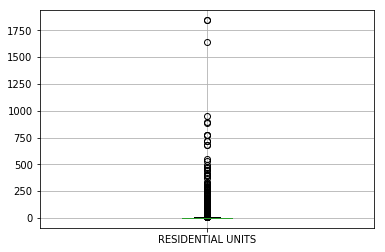

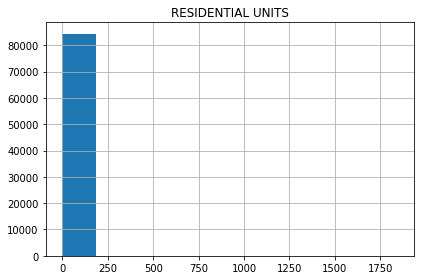

COMMERCIAL UNITS


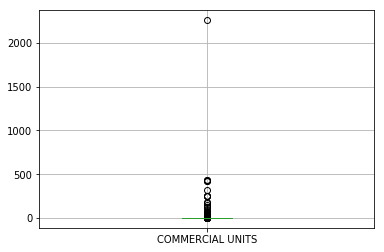

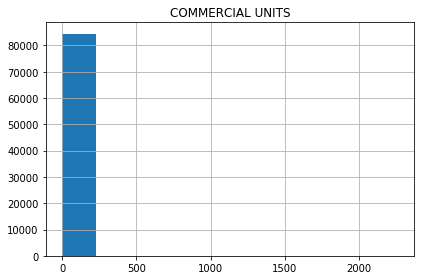

TOTAL UNITS


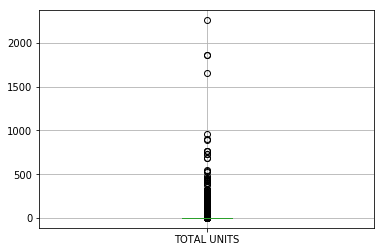

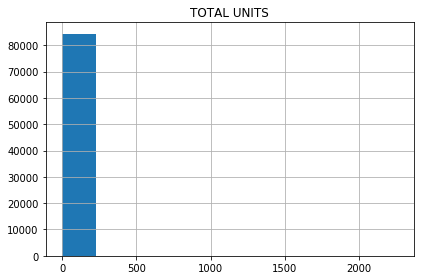

LAND SQUARE FEET


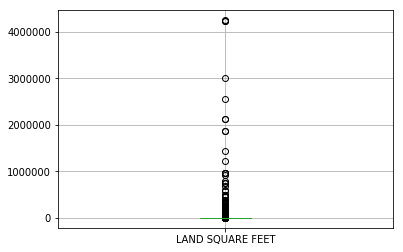

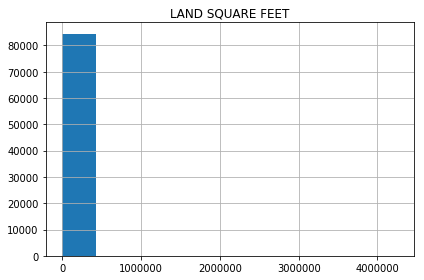

GROSS SQUARE FEET


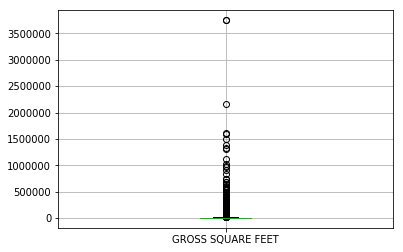

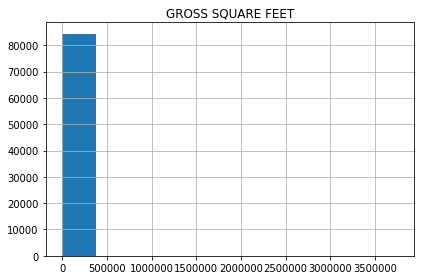

YEAR BUILT


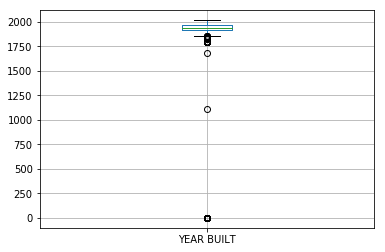

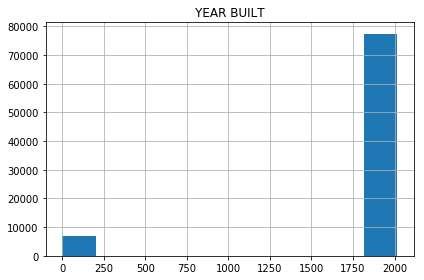

SALE PRICE


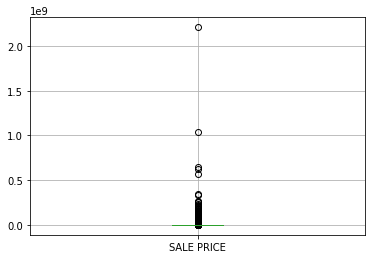

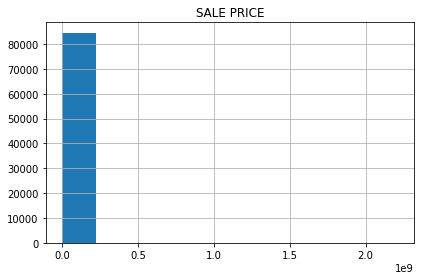

In [24]:
# Lets plot two interesting charts:
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    sales_df.boxplot(column=[col])
    sales_df.hist(column=[col])

    plt.tight_layout()
    plt.show()

Something to note about these charts is that, all of our numerical data seems to have a handful of extreme outliers. This might not be a challenge, because they are likely correlated. As in, the building with 1000+ units is probably also one of the sale price outliers. But it does sort of make the histograms unhelpful. 

We could consider pruning these outliers before going ahead with the rest of this data processing. Lets use some rough and tumble outlier detection code from Stack Overflow and replot.

RESIDENTIAL UNITS


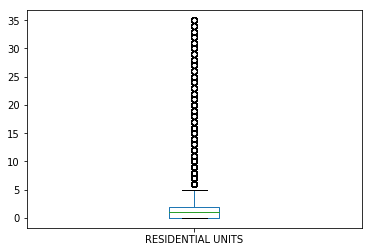

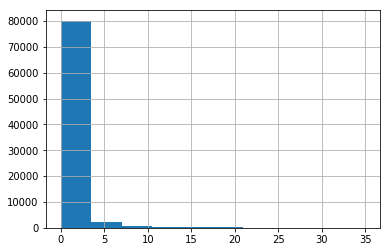

COMMERCIAL UNITS


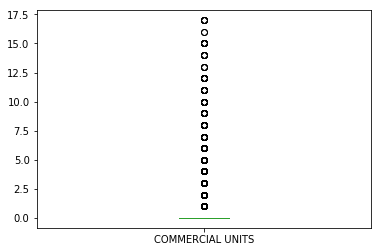

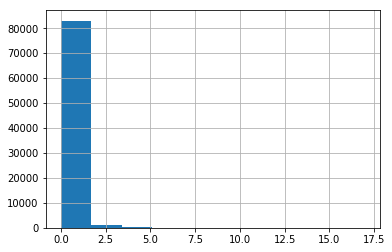

TOTAL UNITS


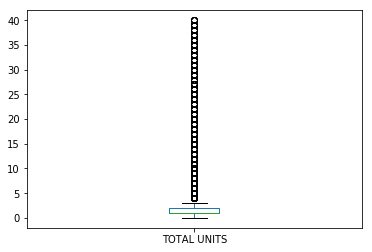

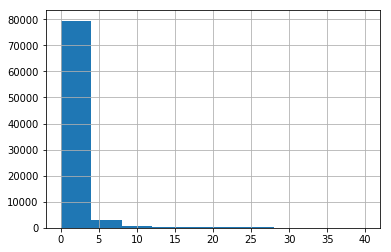

LAND SQUARE FEET


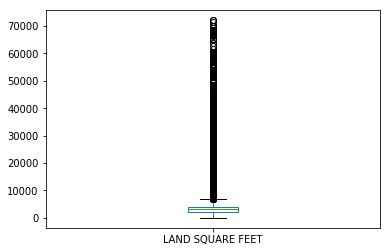

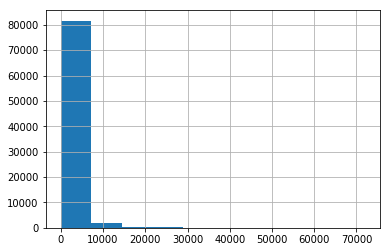

GROSS SQUARE FEET


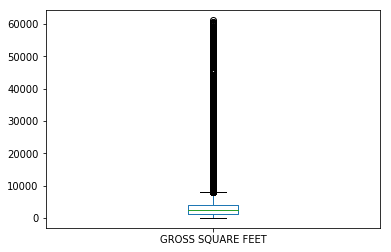

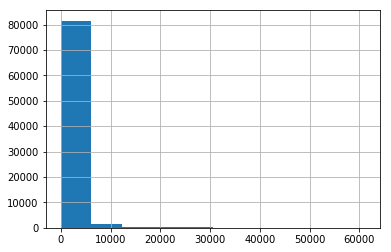

YEAR BUILT


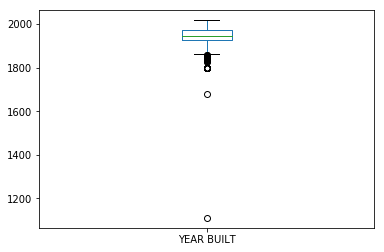

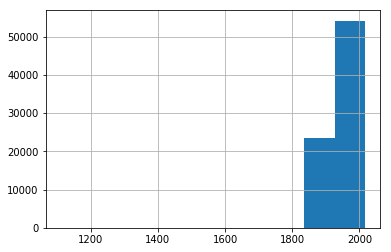

SALE PRICE


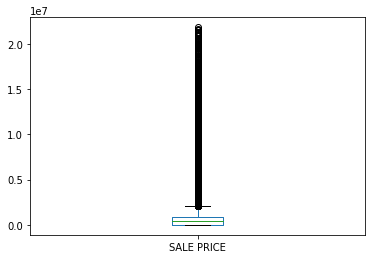

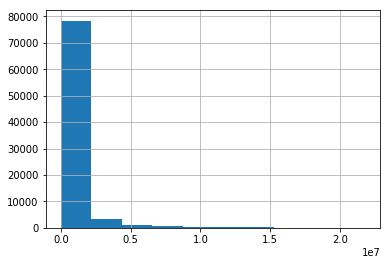

In [25]:
from scipy import stats
import numpy as np

# Lets plot two interesting charts:
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    
    # Quick and dirty outlier filtering, anything over 2 std deviations from the mean 
    # filtered out. 
    filtered_col = sales_df[col][np.abs(stats.zscore(sales_df[col])) < 2]
    
    filtered_col.plot.box()
    plt.show()
    
    filtered_col.hist(bins=10)
    plt.show()

# Cleaning vs Preparing

What we've done above is mostly just cleaning the data. We looked for missing values, and did some spot/sanity checks on our data. We did one thing that you might consider preparing: making some columns categorical. In addition to make sure the data is clean and error free, it's common practice to prepare the data so that it plays nice with neural networks. Two common examples are centering the mean about 0, and normalize the range to be between (0 to 1) or (-1 to 1).

Why? Consider this: year built, square feet, and total units are all going to impact the sale price. One of those might be more impactful than the other, but in the end our neural network is doing a bunch of complex addition and multiplication with those values, but year is always going to be in a range between basically 1900-2017, and units are almost always between 0-50 or so. 1900, when used as a multiplicitive scalar, is going to have a bigger impact than 50. 

For this, and other reasons, it's common to normalize the data so that every datapoint is reduced to it's place within the distribution and to center that distribution between -1 and 1 or 0 and 1. Lets normalize all our numeric values to be between 0 and 1. Note that there are other scaling choices we could make, see the reading resources for this section. 

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Note that we are NOT going to scale "sale price" because
# ultimately that will be our target value. WE still need the
# label to be in the format we wish to predict. 
cols_to_scale = [
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'YEAR BUILT'
]

scaled_cols = scaler.fit_transform(sales_df[cols_to_scale])

# Wow, was it really that easy?
scaled_cols

/Users/tylerbettilyon/.local/share/virtualenvs/deep-learning-intro-1Adgpw9A/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[2.71149675e-03, 0.00000000e+00, 2.21141088e-03, 3.84025029e-04,
        1.71707463e-03, 9.41993059e-01],
       [1.51843818e-02, 1.32684653e-03, 1.37107475e-02, 1.08552329e-03,
        4.98324919e-03, 9.41993059e-01],
       [8.67678959e-03, 4.42282176e-04, 7.51879699e-03, 5.20185771e-04,
        2.08048654e-03, 9.41993059e-01],
       ...,
       [1.08459870e-03, 0.00000000e+00, 8.84564352e-04, 9.40661431e-04,
        3.98873236e-04, 9.54387705e-01],
       [0.00000000e+00, 3.09597523e-03, 3.09597523e-03, 4.89221549e-02,
        1.70952910e-02, 9.92067427e-01],
       [0.00000000e+00, 4.42282176e-04, 4.42282176e-04, 2.53884520e-03,
        6.39903588e-04, 9.94546356e-01]])

In [27]:
# So, we just got back an NDArray, and we need to put these
# columns back into a dataframe.
scaled_df = sales_df.copy(deep=True)

for i, col  in enumerate(cols_to_scale):
    scaled_df[col] = scaled_cols[:, i]

scaled_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,10009,0.002711,0.000000,0.002211,0.000384,0.001717,0.941993,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,0.015184,0.001327,0.013711,0.001086,0.004983,0.941993,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,0.008677,0.000442,0.007519,0.000520,0.002080,0.941993,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10009,0.005423,0.000000,0.004423,0.000534,0.001811,0.948438,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,10009,0.003254,0.000000,0.002654,0.000557,0.001230,0.941993,2,C2,8000000.0


In [28]:
scaled_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,0.001098,0.000086,0.000995,0.000927,0.001079,0.887121,1.056623e+06
std,0.009068,0.003854,0.008391,0.008198,0.007665,0.266408,1.038794e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000442,0.000470,0.000359,0.951909,0.000000e+00
50%,0.000542,0.000000,0.000442,0.000753,0.000672,0.961824,4.150000e+05
75%,0.001085,0.000000,0.000885,0.000927,0.001079,0.974219,8.300000e+05
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.210000e+09


In [29]:
# Even though we labeled some columns as "category" we still need to one-hot 
# encode them. Pandas makes this super easy too:
scaled_dummy_df = pd.get_dummies(scaled_df)
scaled_dummy_df.head(1)

# Note that this takes awhile, it's procecssing a lot of data. 
# Note also that pandas automatically looks for columns with
# a categorical type, so being explicit above was important 
# to making this part easy.

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,...,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
0,0.002711,0.0,0.002211,0.000384,0.001717,0.941993,6625000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Holy crap, 12,413 columns!

# Note that all our numeric columns are between 0 and 1, except SALE PRICE
# All that's left to do here is to separate the labels from the features.

x_train = scaled_dummy_df.drop(columns=['SALE PRICE'])
y_train = scaled_dummy_df['SALE PRICE']

x_train.head(1)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,...,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
0,0.002711,0.0,0.002211,0.000384,0.001717,0.941993,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y_train.head(1)

0    6625000.0
Name: SALE PRICE, dtype: float64

In [32]:
# Sweet, lets make a simple neural net with keras to make sure we can run the data
# through it. We don't expect great predictions out of this simple model we just
# want to be sure that we can :
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Sigmoid and other functions that squash the output might not be
# very appropriate for this task, because our target values are 
# quite large!
model.add(Dense(units=32, activation='relu', input_shape=(len(x_train.columns),)))

# For regression it's common to use a linear activation function
# since our output could be anything. In our case, it would never
# make sense to guess less than 0, so I'm using relu
model.add(Dense(units=1, activation='relu'))

# This function provides useful text data for our network
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                397216    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 397,249
Trainable params: 397,249
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Train on 67638 samples, validate on 16910 samples
Epoch 1/5
67638/67638 [==============================] - 62s 911us/step - loss: 135514447459043.1719 - val_loss: 3067318119042.6191
Epoch 2/5
67638/67638 [==============================] - 56s 827us/step - loss: 135514111749335.7969 - val_loss: 3067175639112.4248
Epoch 3/5
67638/67638 [==============================] - 56s 830us/step - loss: 135513500542116.6250 - val_loss: 3066945655949.0957
Epoch 4/5
67638/67638 [==============================] - 58s 857us/step - loss: 135512595877045.1719 - val_loss: 3066636823932.1699
Epoch 5/5
67638/67638 [==============================] - 54s 798us/step - loss: 135511465057289.2812 - val_loss: 3066261550239.5044


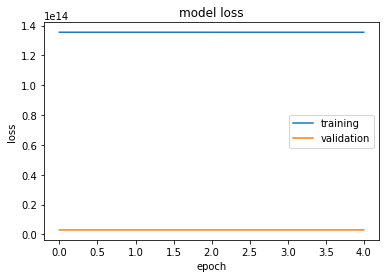

In [33]:
# MSE is pretty common for regression tasks
model.compile(optimizer="adam", loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

In [68]:
# So... our model didn't do so great. Okay, it did terribly. 
# It's off by a lot and is clearly overfitting the training data.

# Why might we be getting such poor performance? 

# How could we improve?

# What should we do to the data?

# What about to the model?

In [ ]:
# Two things I would look at:

# Consider discritizing and building a classifier instead of a regressor! 
  # Neural networks tend to be much better at classification tasks.
  # Plus, it's just easier to predict 1 of 10 values compared to a 
  # continious space $0-$100,000,000 or so

# Consider dropping the values with 0 SALE PRICE or any very low value
  # those are not representative of actual sale prices!